### Import libraries

In [2]:
import sys
sys.path.append("..")
import os
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader, data_generation
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import itertools

In [5]:
kernel = "yearly_global_avg_climate"
d = True

In [88]:
d = xarray.open_dataset("/Users/omernivron/Downloads/MPI_ESM/ts_Amon_MPI-ESM_historical_r081i1850p3_185001-200512.nc")

In [100]:
aaa = d.sel(bnds=0).to_dataframe().reset_index()

In [101]:
aaa

lat      lon                time  time_bnds   lat_bnds  \
0        -88.572169    0.000 1850-01-16 12:00:00 1850-01-01 -89.496987   
1        -88.572169    0.000 1850-02-15 00:00:00 1850-02-01 -89.496987   
2        -88.572169    0.000 1850-03-16 12:00:00 1850-03-01 -89.496987   
3        -88.572169    0.000 1850-04-16 00:00:00 1850-04-01 -89.496987   
4        -88.572169    0.000 1850-05-16 12:00:00 1850-05-01 -89.496987   
...             ...      ...                 ...        ...        ...   
34504699  88.572169  358.125 2005-08-16 12:00:00 2005-08-01  87.647350   
34504700  88.572169  358.125 2005-09-16 00:00:00 2005-09-01  87.647350   
34504701  88.572169  358.125 2005-10-16 12:00:00 2005-10-01  87.647350   
34504702  88.572169  358.125 2005-11-16 00:00:00 2005-11-01  87.647350   
34504703  88.572169  358.125 2005-12-16 12:00:00 2005-12-01  87.647350   

          lon_bnds          ts  
0          -0.9375  241.115677  
1          -0.9375  234.303040  
2          -0.9375  223.305405  
3          -0.9375  218.928116  
4          -0.9375  215.077927  
...            ...         ...  
34504699  357.1875  271.943481  
34504700  357.1875  268.799927  
34504701  357.1875  264.891418  
34504702  357.1875  251.437943  
34504703  357.1875  251.909882  

[34504704 rows x 7 columns]

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(aaa['lat'], aaa['lon'])

In [6]:
mpi = np.load('/Users/omernivron/Downloads/MPI_ESM_yearly_global_mean.npy')
gfdl = np.load('/Users/omernivron/Downloads/GFDL_yearly_global_mean.npy')

In [6]:
mpi.shape

(32, 85)

In [6]:
save_dir = os.path.expanduser('~/Downloads/' + kernel)

In [7]:
mpi.shape

(32, 85)

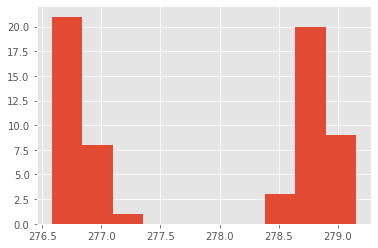

(array([12., 17.,  1.,  0.,  0.,  0.,  0.,  1., 15., 16.]),
 array([276.55654907, 276.80592957, 277.05531006, 277.30469055,
        277.55407104, 277.80345154, 278.05283203, 278.30221252,
        278.55159302, 278.80097351, 279.050354  ]),
 <a list of 10 Patch objects>)

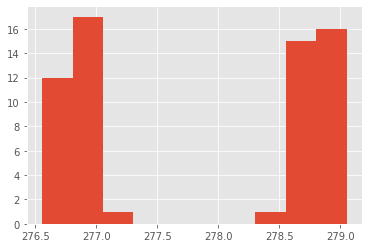

In [10]:
plt.hist(np.concatenate((mpi[:, 7], gfdl[:, 7]), axis=0))
plt.show()
plt.hist(np.concatenate((mpi[:, 14], gfdl[:, 14]), axis=0))

In [7]:
import xarray 

In [76]:
aa = xarray.open_dataset("/Users/omernivron/Desktop/mala.nc")

In [77]:
bb = aa.sel(expver=1)

In [78]:
bb

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 185, time: 61256)
Coordinates:
  * longitude  (longitude) float32 67.0 67.25 67.5 67.75 ... 112.5 112.75 113.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 0.75 0.5 0.25 0.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 ... 2020-12-04T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-09 03:35:40 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [84]:
bb.longitude

<xarray.DataArray 'longitude' (longitude: 185)>
array([ 67.  ,  67.25,  67.5 ,  67.75,  68.  ,  68.25,  68.5 ,  68.75,  69.  ,
        69.25,  69.5 ,  69.75,  70.  ,  70.25,  70.5 ,  70.75,  71.  ,  71.25,
        71.5 ,  71.75,  72.  ,  72.25,  72.5 ,  72.75,  73.  ,  73.25,  73.5 ,
        73.75,  74.  ,  74.25,  74.5 ,  74.75,  75.  ,  75.25,  75.5 ,  75.75,
        76.  ,  76.25,  76.5 ,  76.75,  77.  ,  77.25,  77.5 ,  77.75,  78.  ,
        78.25,  78.5 ,  78.75,  79.  ,  79.25,  79.5 ,  79.75,  80.  ,  80.25,
        80.5 ,  80.75,  81.  ,  81.25,  81.5 ,  81.75,  82.  ,  82.25,  82.5 ,
        82.75,  83.  ,  83.25,  83.5 ,  83.75,  84.  ,  84.25,  84.5 ,  84.75,
        85.  ,  85.25,  85.5 ,  85.75,  86.  ,  86.25,  86.5 ,  86.75,  87.  ,
        87.25,  87.5 ,  87.75,  88.  ,  88.25,  88.5 ,  88.75,  89.  ,  89.25,
        89.5 ,  89.75,  90.  ,  90.25,  90.5 ,  90.75,  91.  ,  91.25,  91.5 ,
        91.75,  92.  ,  92.25,  92.5 ,  92.75,  93.  ,  93.25,  93.5 ,  93.75,
        94.  ,  94.25,  94.5 ,  94.75,  95.  ,  95.25,  95.5 ,  95.75,  96.  ,
        96.25,  96.5 ,  96.75,  97.  ,  97.25,  97.5 ,  97.75,  98.  ,  98.25,
        98.5 ,  98.75,  99.  ,  99.25,  99.5 ,  99.75, 100.  , 100.25, 100.5 ,
       100.75, 101.  , 101.25, 101.5 , 101.75, 102.  , 102.25, 102.5 , 102.75,
       103.  , 103.25, 103.5 , 103.75, 104.  , 104.25, 104.5 , 104.75, 105.  ,
       105.25, 105.5 , 105.75, 106.  , 106.25, 106.5 , 106.75, 107.  , 107.25,
       107.5 , 107.75, 108.  , 108.25, 108.5 , 108.75, 109.  , 109.25, 109.5 ,
       109.75, 110.  , 110.25, 110.5 , 110.75, 111.  , 111.25, 111.5 , 111.75,
       112.  , 112.25, 112.5 , 112.75, 113.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 67.0 67.25 67.5 67.75 ... 112.5 112.75 113.0
    expver     int32 1
Attributes:
    units:      degrees_east
    long_name:  longitude

In [19]:
bb = bb.stack(latlon=['latitude','longitude'])

In [20]:
bb = bb.groupby('latlon').mean()

In [22]:
bb = bb.mean('latlon')

In [75]:
bb

<xarray.Dataset>
Dimensions:  (time: 61256)
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 ... 2020-12-04T18:00:00
Data variables:
    t2m      (time) float32 281.19507 287.48767 286.2084 ... 273.5639 273.5639

In [26]:
cc = bb.to_dataframe().reset_index()

In [30]:
cc['month'] = cc.time.dt.month

In [31]:
cc['year'] = cc.time.dt.year

In [33]:
cc['day'] = cc.time.dt.day

In [72]:
dd2 = cc.groupby(['year', 'month']).mean().reset_index()[['year','month','t2m']]

In [74]:
pd.DataFrame.to_csv(dd2, 'global_observations_mon_avg.csv')

In [37]:
dd = cc.groupby('year').mean().reset_index()[['year','t2m']]

In [14]:
bb['time'].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
403     8
404     9
405    10
406    11
407    12
Name: time, Length: 408, dtype: int64

In [15]:
bb['t'] = bb['time'].dt.year + (bb['time'].dt.month - 1) / 12

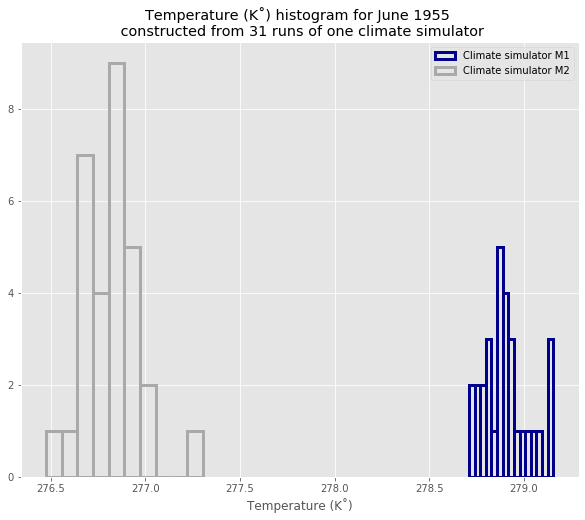

In [16]:
plt.figure(figsize = (10, 8))
plt.hist((mpi[:30, 30]),bins =15, lw=3,  fc=(0, 0, 0, 0), edgecolor='darkblue', label = 'Climate simulator M1')
plt.hist((gfdl[:30, 30]), lw=3,  fc=(0, 0, 0, 0), edgecolor='darkgray', label = 'Climate simulator M2')
plt.title('Temperature (K˚) histogram for June 1955 \n constructed from 31 runs of one climate simulator')
plt.legend()
plt.xlabel('Temperature (K˚)')
plt.show()

In [51]:
t = np.arange(1, 13, 1)

In [117]:
t = np.array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [103]:
a = np.random.normal(17, 0.15, (5, 12)) 

In [104]:
a[0, 3:] = a[0, 3:] + 3
a[1, 5:] = a[1, 5:] + 3
a[2, 2:] = a[2, 2:] + 3
a[3, 1:] = a[3, 1:] + 3
a[4, 2:] = a[4, 2:] + 3

In [90]:
a.shape

(5, 12)

In [114]:
np.tile(t, 5).reshape(5, 12).transpose()

array([['Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
       ['Feb', 'Feb', 'Feb', 'Feb', 'Feb'],
       ['Mar', 'Mar', 'Mar', 'Mar', 'Mar'],
       ['April', 'April', 'April', 'April', 'April'],
       ['May', 'May', 'May', 'May', 'May'],
       ['June', 'June', 'June', 'June', 'June'],
       ['July', 'July', 'July', 'July', 'July'],
       ['Aug', 'Aug', 'Aug', 'Aug', 'Aug'],
       ['Sep', 'Sep', 'Sep', 'Sep', 'Sep'],
       ['Oct', 'Oct', 'Oct', 'Oct', 'Oct'],
       ['Nov', 'Nov', 'Nov', 'Nov', 'Nov'],
       ['Dec', 'Dec', 'Dec', 'Dec', 'Dec']], dtype='<U5')

In [129]:
import matplotlib.patches as mpatches


In [142]:
k = np.tile(np.arange(1, 13), 5).reshape(5, 12)

In [143]:
k

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [12]:
from cycler import cycler

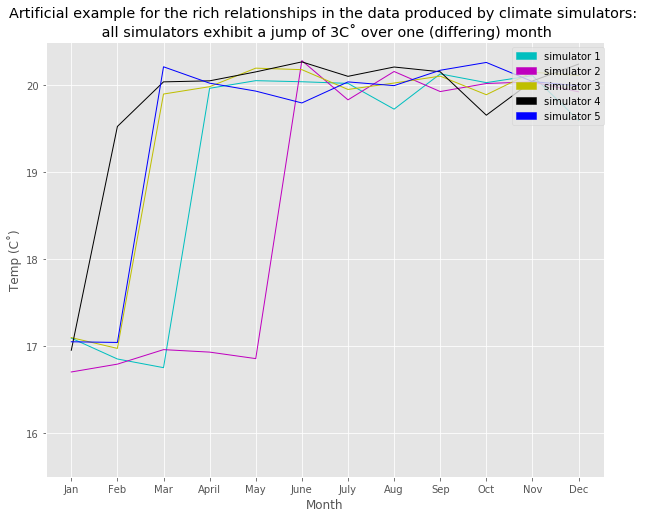

In [188]:
# plt.figure(figsize=(10, 8))
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c'])))
fig, (ax1) = plt.subplots(nrows=1, figsize = (10, 8))

ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k', 'b']) +
                   cycler('lw', [1, 1, 1, 1, 1]))
plt.ylim(15.5, 20.5)
plt.xticks(range(len(t)), t)
ax1.plot(a.transpose())
plt.ylabel('Temp (C˚)')
plt.xlabel('Month')
plt.title('Artificial example for the rich relationships in the data produced by climate simulators: \n all simulators exhibit a jump of 3C˚ over one (differing) month')
my_colors = ({'simulator 1' : 'c',
    'simulator 2' : 'm', # It is normalised to 0 to 1
    'simulator 3' : 'y',
    'simulator 4' : 'k',
    'simulator 5' : 'b'})
patches = [mpatches.Patch(color=v,  label=k) for k,v in sorted(my_colors.items(), key=lambda t: t[0])]
plt.legend(handles=patches, loc=1, bbox_to_anchor=(1.01, 1))
plt.show()

In [ ]:
plt.plot(np.repeat(t[:85] + 1967.5, 31).reshape(31, -1), mpi[:31])

In [194]:
x = np.random.normal(0,1, 1000)

In [195]:
y = np.repeat(0, len(x))

AttributeError: 'PathCollection' object has no property 'jitter'

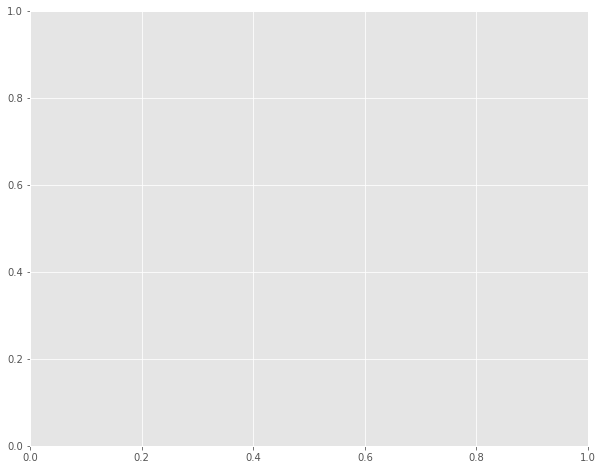

In [233]:
plt.figure(figsize = (10, 8))
a = np.histogram(x, bins =1300)
plt.scatter(x, y, alpha = 0.1, jitter = 0.7)

In [181]:
len(np.unique(a[0]))

273

In [24]:
bb['mon'] = bb['time'].dt.month

In [25]:
bb['Y'] = bb['time'].dt.year

In [37]:
bb

time         t2m            t  mon     Y
0   1981-01-01  266.020172  1981.000000    1  1981
1   1981-02-01  264.461975  1981.083333    2  1981
2   1981-03-01  264.960480  1981.166667    3  1981
3   1981-04-01  266.272827  1981.250000    4  1981
4   1981-05-01  269.237762  1981.333333    5  1981
..         ...         ...          ...  ...   ...
403 2014-08-01  272.530731  2014.583333    8  2014
404 2014-09-01  270.830292  2014.666667    9  2014
405 2014-10-01  268.438477  2014.750000   10  2014
406 2014-11-01  266.694794  2014.833333   11  2014
407 2014-12-01  266.313660  2014.916667   12  2014

[408 rows x 5 columns]

In [26]:
cc = bb.groupby('Y').mean().reset_index()

In [27]:
cc

Y         t2m            t  mon
0   1981  268.156586  1981.458333  6.5
1   1982  267.525513  1982.458333  6.5
2   1983  267.770508  1983.458333  6.5
3   1984  267.656342  1984.458333  6.5
4   1985  267.437775  1985.458333  6.5
5   1986  267.688232  1986.458333  6.5
6   1987  267.610718  1987.458333  6.5
7   1988  268.164520  1988.458333  6.5
8   1989  267.785828  1989.458333  6.5
9   1990  268.099182  1990.458333  6.5
10  1991  268.176270  1991.458333  6.5
11  1992  267.679138  1992.458333  6.5
12  1993  267.627045  1993.458333  6.5
13  1994  267.671478  1994.458333  6.5
14  1995  268.044678  1995.458333  6.5
15  1996  267.930237  1996.458333  6.5
16  1997  267.739777  1997.458333  6.5
17  1998  268.042114  1998.458333  6.5
18  1999  267.898743  1999.458333  6.5
19  2000  267.823639  2000.458333  6.5
20  2001  268.115631  2001.458333  6.5
21  2002  268.451385  2002.458333  6.5
22  2003  268.213257  2003.458333  6.5
23  2004  267.926300  2004.458333  6.5
24  2005  268.556122  2005.458333  6.5
25  2006  268.235229  2006.458333  6.5
26  2007  268.558441  2007.458333  6.5
27  2008  268.163910  2008.458333  6.5
28  2009  268.314819  2009.458333  6.5
29  2010  268.423279  2010.458333  6.5
30  2011  268.440887  2011.458333  6.5
31  2012  268.263489  2012.458333  6.5
32  2013  268.521606  2013.458333  6.5
33  2014  268.330750  2014.458333  6.5

In [66]:
t

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 19

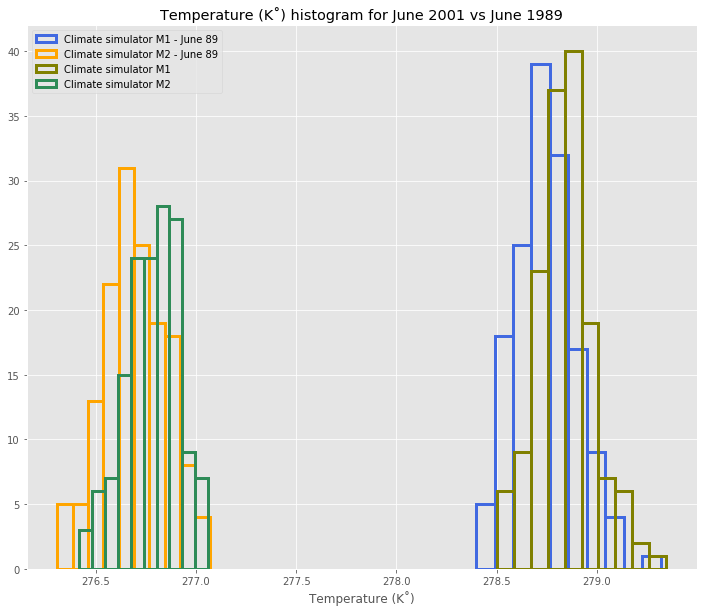

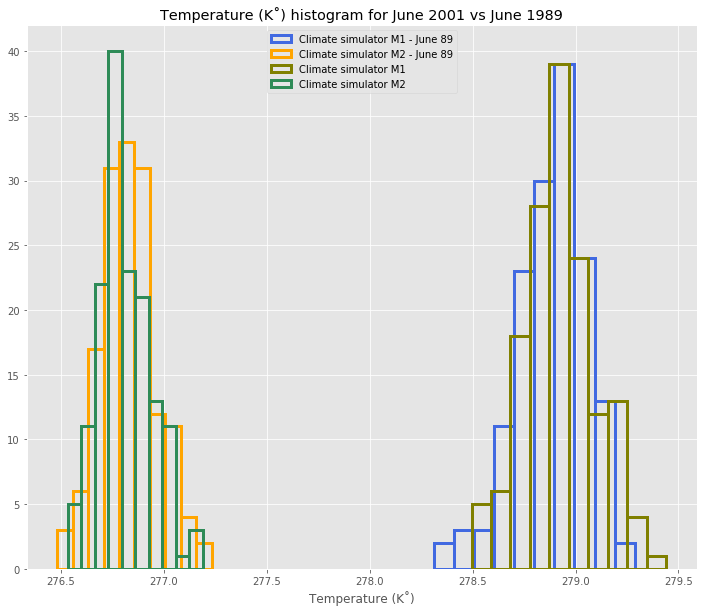

No handles with labels found to put in legend.


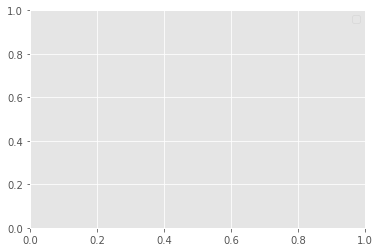

In [73]:
plt.figure(figsize = (12, 10))
plt.hist((mpi[:30, :5].reshape(-1)),edgecolor='royalblue', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M1 - June 89')
plt.hist((gfdl[:30, :5].reshape(-1)), edgecolor='orange', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M2 - June 89')

plt.hist((mpi[:30, 9:14].reshape(-1)), edgecolor='olive', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M1')
plt.hist((gfdl[:30, 9:14].reshape(-1)),edgecolor='seagreen', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M2')
plt.title('Temperature (K˚) histogram for June 2001 vs June 1989')
plt.legend()
plt.xlabel('Temperature (K˚)')


plt.figure(figsize = (12, 10))
plt.hist((mpi[:30, 16:21].reshape(-1)),edgecolor='royalblue', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M1 - June 89')
plt.hist((gfdl[:30, 16:21].reshape(-1)), edgecolor='orange', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M2 - June 89')

plt.hist((mpi[:30, 32:37].reshape(-1)), edgecolor='olive', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M1')
plt.hist((gfdl[:30, 32:37].reshape(-1)),edgecolor='seagreen', lw=3,  fc=(0, 0, 0, 0), label = 'Climate simulator M2')
plt.title('Temperature (K˚) histogram for June 2001 vs June 1989')
plt.legend()
plt.xlabel('Temperature (K˚)')
plt.show()

plt.legend()
plt.show()

In [22]:
t[60]

1981

In [45]:
for i in range(60, 85, 5):
    plt.figure(figsize=(10, 8))
    a = (mpi[:30, i:(i+5)]).reshape(-1)
    b = cc.loc[(i-60):(i-55), 't2m']
    print(a.mean() - b.mean())
#     plt.hist(a, color= 'blue')
#     plt.hist(b)
#     plt.show()

11.451175944010402
11.366609293619774
11.416196085612
11.579791463216168
11.406339111328123


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

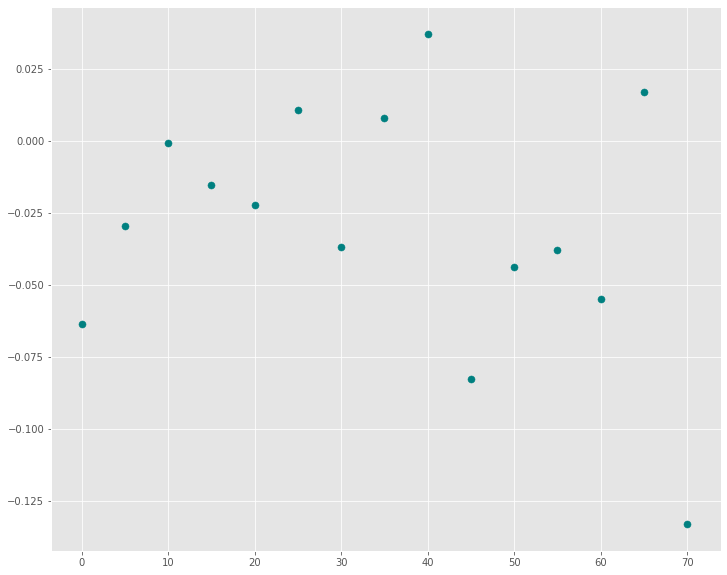

In [80]:
plt.figure(figsize = (12, 10))
for i in range(0, 75, 5):
    a = np.mean(mpi[:30, i:(i+5)])
    b = np.mean(mpi[:30, (i+3):(i+8)])
    shift = a - b
    plt.scatter(i, shift, s =50, c='teal')

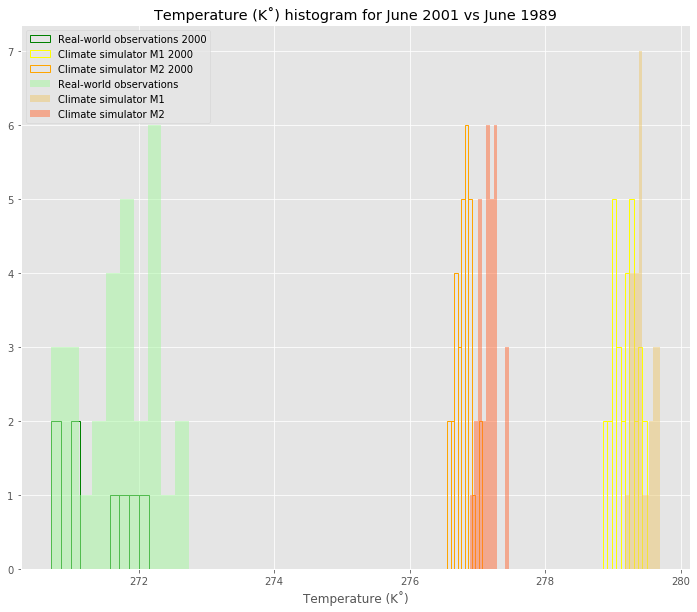

No handles with labels found to put in legend.


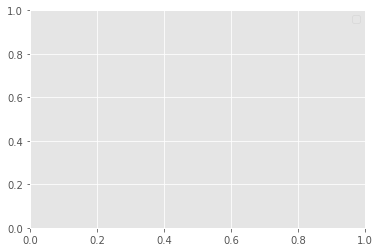

In [260]:
plt.figure(figsize = (12, 10))
plt.hist(bb[(bb['mon'] == 6) & (bb['Y'] <1989)]['t2m'], edgecolor='green', lw=1,  fc=(0, 0, 0, 0), label = 'Real-world observations 2000')
plt.hist((mpi[:30, -21]),edgecolor='yellow', lw=1,  fc=(0, 0, 0, 0), label = 'Climate simulator M1 2000')
plt.hist((gfdl[:30, -21]), edgecolor='orange', lw=1,  fc=(0, 0, 0, 0), label = 'Climate simulator M2 2000')

plt.hist(bb[(bb['mon'] == 6) & (bb['Y'] <2010)]['t2m'], lw=3, label = 'Real-world observations', alpha = 0.5)
plt.hist((mpi[:30, -9]), lw=3, label = 'Climate simulator M1', alpha = 0.5)
plt.hist((gfdl[:30, -9]), lw=3, label = 'Climate simulator M2', alpha =0.5)
plt.title('Temperature (K˚) histogram for June 2001 vs June 1989')
plt.legend()
plt.xlabel('Temperature (K˚)')
plt.show()

plt.legend()
plt.show()

In [43]:
dd['year']

0     1979
1     1980
2     1981
3     1982
4     1983
5     1984
6     1985
7     1986
8     1987
9     1988
10    1989
11    1990
12    1991
13    1992
14    1993
15    1994
16    1995
17    1996
18    1997
19    1998
20    1999
21    2000
22    2001
23    2002
24    2003
25    2004
26    2005
27    2006
28    2007
29    2008
30    2009
31    2010
32    2011
33    2012
34    2013
35    2014
36    2015
37    2016
38    2017
39    2018
40    2019
41    2020
Name: year, dtype: int64

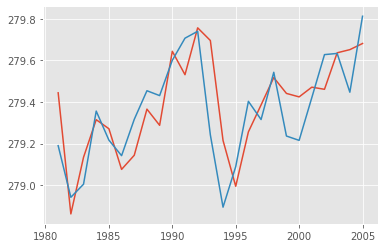

In [69]:
plt.plot(np.repeat(t[60:85], 2).reshape(-1, 2), mpi[12:14, 60:].reshape(-1, 2))

In [8]:
import pandas as pd

In [10]:
pj = pd.read_csv('/Users/omernivron/Downloads/yearly_avg_global_observations.csv')

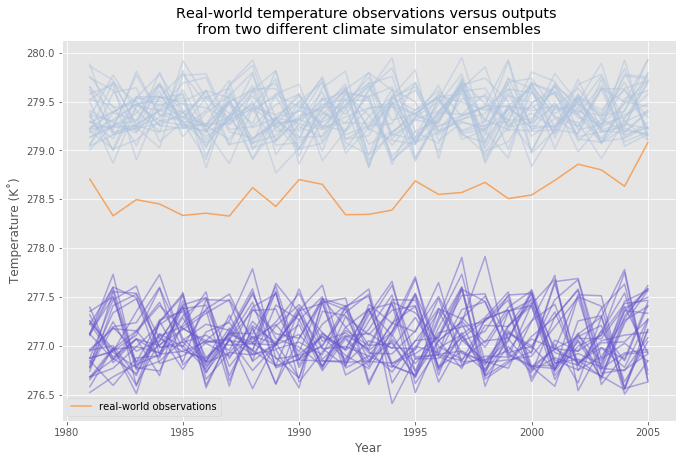

In [15]:
fig, scatter = plt.subplots(figsize = (11,7))
plt.plot(np.repeat(t[60:85] , 31).reshape(-1, 31), mpi[:31, 60:].reshape(-1, 31), c = 'lightsteelblue', alpha = 0.5)
plt.plot(np.repeat(t[60:85], 30).reshape(-1, 30), gfdl[:30, 60:].reshape(-1, 30), c= 'slateblue', alpha = 0.5)
plt.plot(pj['year'][2:-14], pj['T2'][2:-14], c = 'sandybrown', label = 'real-world observations')
plt.title('Real-world temperature observations versus outputs \nfrom two different climate simulator ensembles')
plt.ylabel('Temperature (K˚)')
plt.xlabel('Year')
plt.legend()
plt.show()
# plt.plot(t[:85], gfdl[17])

In [13]:
import seaborn as sns

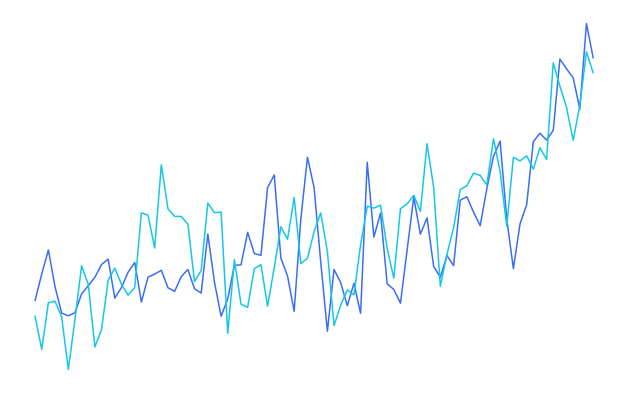

In [14]:
fig, scatter = plt.subplots(figsize = (11,7))
sns.lineplot((t[:85]), mpi[17])
# plt.legend()
plt.axis('off')
# plt.savefig('aa', transparent =True)



sns.lineplot(t[:85], mpi[7])
plt.axis('off')
# plt.legend()
# plt.savefig('aa', transparent =True)
plt.show()


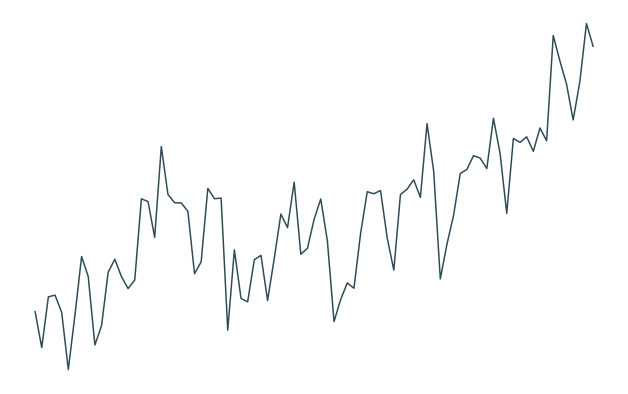

In [72]:
fig, scatter = plt.subplots(figsize = (11,7))
sns.set_palette("PuBuGn_d")
sns.lineplot(t[:85], mpi[7])
plt.axis('off')
# plt.legend()
plt.savefig('bb', transparent =True)
plt.show()

In [43]:
data = np.concatenate((mpi, gfdl), axis = 0)
μ = np.mean(data)
σ = np.std(data)
mpi = (mpi - μ) 
gfdl = (gfdl - μ) 

In [44]:
n = mpi.shape[0]
m = gfdl.shape[0]
seq_len = 85

In [45]:
gfdl.shape

(30, 85)

In [46]:
combos = list(itertools.combinations(np.arange(n), 2)) + [(i, i) for i in range(n)]
data = [np.concatenate((mpi[pair[0]].reshape(1, -1), gfdl[pair[1]].reshape(1, -1)), axis = 1) if (pair[1] < 30) else np.zeros((1, 170)) for pair in combos]
y = np.array(data)

In [47]:
df = np.concatenate(data, axis=0)

In [48]:
y = df[~np.all(df == 0, axis=1)]

In [12]:
t = np.concatenate((np.arange(1921, 2006), np.arange(1921, 2006)))
# t = t - np.mean(np.arange(1921, 2006))

In [50]:
t.shape

(170,)

In [51]:
def embed_position(t, d, TΔmin, Tmax):  # return.shape=(T,B,d)
    # t.shape=(T,B)   T=sequence_length, B=batch_size
    """A position-embedder, similar to the Attention paper, but tweaked to account for
    floating point positions, rather than integer.
    """
    R = Tmax / TΔmin * 100
    drange_even = TΔmin * R**(np.arange(0,d,2)/d)
    drange_odd = TΔmin * R**((np.arange(1,d,2) - 1)/d)
    x = np.concatenate([np.sin(t[:,:,None] / drange_even), np.cos(t[:,:,None] / drange_odd)], 2)
    return x

In [52]:
k = np.concatenate([np.zeros(seq_len, dtype=int), np.ones(seq_len, dtype=int)])

In [53]:
x1 = embed_position(t[:,None], d=94, TΔmin= 0.2, Tmax=30)
x2 = tf.one_hot(k, 2)[:, None, :]
x = np.concatenate((x1, x2), axis =-1).squeeze()[None, :, :]

In [54]:
k.shape

(170,)

In [62]:
x.shape

(1, 170, 96)

In [63]:
y.shape

(465, 170)

In [56]:
batch_x = np.repeat(x, 32, axis =0)

In [93]:
t.shape

(170,)

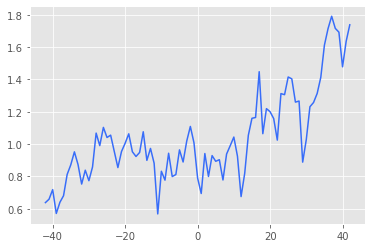

In [98]:
cmap = plt.get_cmap('Paired', 2)

fig,ax = plt.subplots()
# ax.scatter(t, y[24], c=k, cmap=cmap)
# ax.scatter(t, y[18], c=k)
ax.plot(t[:85], y[38][:85])
ax.plot(t[:85], y[38][:85])
plt.show()

In [58]:
train_step, test_step, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [59]:
# b_data = batch_creator.create_batch(em_x = data[1], em_y=data[3], x = data[5], y = data[-1], batch_s=2, d=d)
# b_data_te = b_data

In [60]:
# Uncomment the two lines below for one batch to overfit on
# np.random.seed(443)
# b_data, c = batch_creator.create_batch_2d(data[2], data[-3], data[-1], batch_s=20, em_2 = data[3])

### Training

Does not exist
New folder /Users/omernivron/Downloads/yearly_global_avg_climate/ckpt/check_run_2
Initializing from scratch.


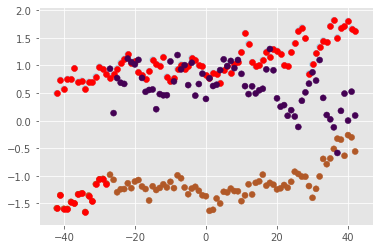

Epoch 0 batch 0 train Loss 1.5346 test Loss 0.8713 with training MSE metric 3.9639 and testing MSE metric 3.3063
learning rate is 0.0003000000142492354


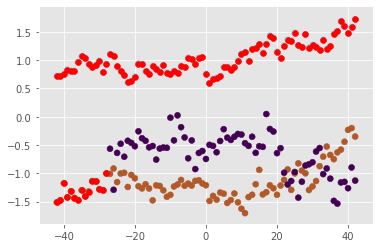

Epoch 0 batch 10 train Loss 0.6729 test Loss 0.6489 with training MSE metric 0.6233 and testing MSE metric 0.5605
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 6.6994309425354 secs



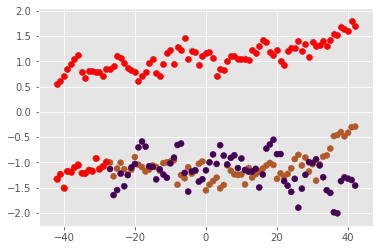

Epoch 1 batch 0 train Loss 0.1512 test Loss 0.1085 with training MSE metric 0.2750 and testing MSE metric 0.2668
learning rate is 0.0003000000142492354


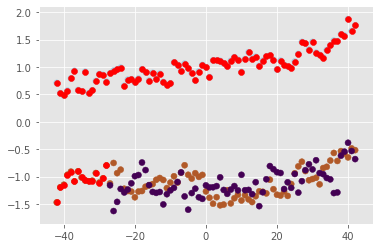

Epoch 1 batch 10 train Loss -0.0829 test Loss -0.1973 with training MSE metric 0.1231 and testing MSE metric 0.0852
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8566629886627197 secs



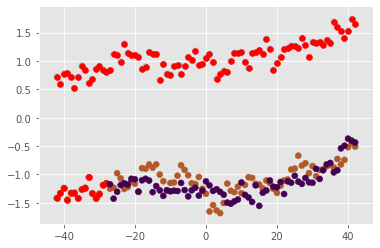

Epoch 2 batch 0 train Loss -0.2682 test Loss -0.3546 with training MSE metric 0.0588 and testing MSE metric 0.0375
learning rate is 0.0003000000142492354


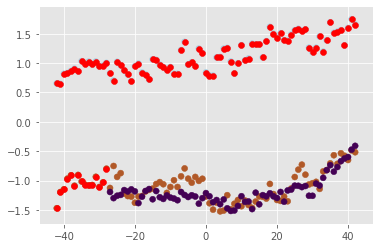

Epoch 2 batch 10 train Loss -0.3519 test Loss -0.4413 with training MSE metric 0.0431 and testing MSE metric 0.0279
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9801909923553467 secs



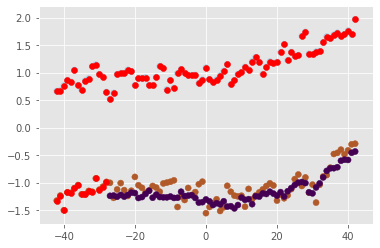

Epoch 3 batch 0 train Loss -0.3819 test Loss -0.4954 with training MSE metric 0.0374 and testing MSE metric 0.0239
learning rate is 0.0003000000142492354


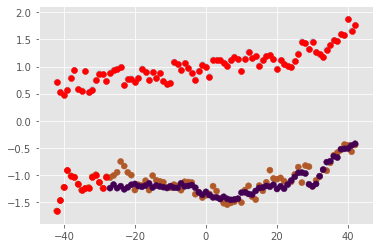

Epoch 3 batch 10 train Loss -0.4392 test Loss -0.5329 with training MSE metric 0.0309 and testing MSE metric 0.0204
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.029706001281738 secs



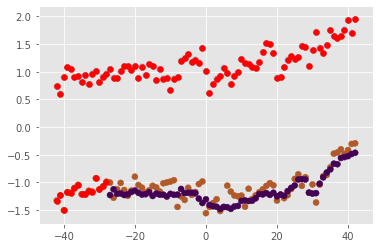

Epoch 4 batch 0 train Loss -0.4694 test Loss -0.5589 with training MSE metric 0.0277 and testing MSE metric 0.0192
learning rate is 0.0003000000142492354


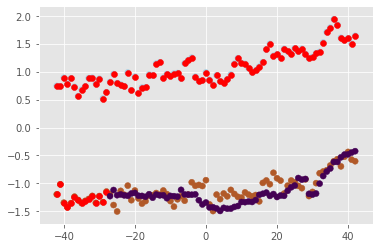

Epoch 4 batch 10 train Loss -0.4591 test Loss -0.5644 with training MSE metric 0.0284 and testing MSE metric 0.0192
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.908370018005371 secs



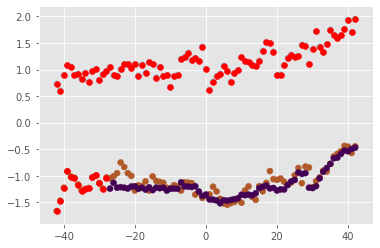

Epoch 5 batch 0 train Loss -0.4922 test Loss -0.5583 with training MSE metric 0.0248 and testing MSE metric 0.0195
learning rate is 0.0003000000142492354


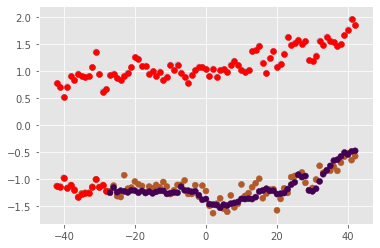

Epoch 5 batch 10 train Loss -0.4938 test Loss -0.5803 with training MSE metric 0.0249 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9890480041503906 secs



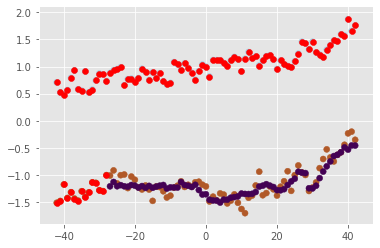

Epoch 6 batch 0 train Loss -0.5111 test Loss -0.5457 with training MSE metric 0.0237 and testing MSE metric 0.0212
learning rate is 0.0003000000142492354


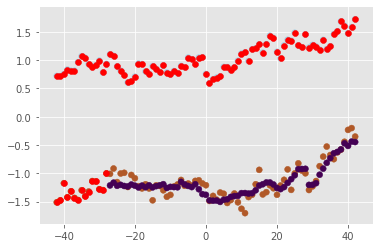

Epoch 6 batch 10 train Loss -0.5194 test Loss -0.5736 with training MSE metric 0.0230 and testing MSE metric 0.0190
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9397222995758057 secs



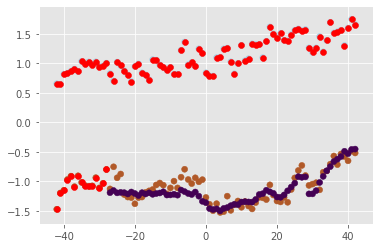

Epoch 7 batch 0 train Loss -0.5024 test Loss -0.5829 with training MSE metric 0.0250 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354


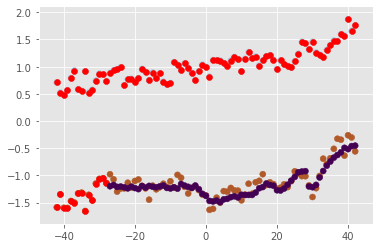

Epoch 7 batch 10 train Loss -0.4898 test Loss -0.5698 with training MSE metric 0.0254 and testing MSE metric 0.0195
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9271810054779053 secs



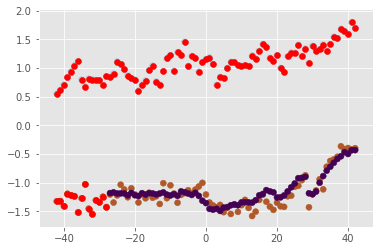

Epoch 8 batch 0 train Loss -0.5378 test Loss -0.5894 with training MSE metric 0.0216 and testing MSE metric 0.0179
learning rate is 0.0003000000142492354


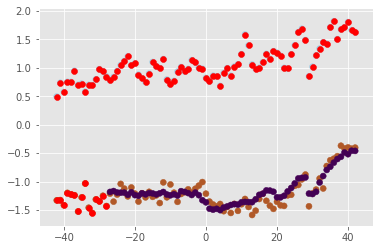

Epoch 8 batch 10 train Loss -0.5274 test Loss -0.5901 with training MSE metric 0.0220 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8819241523742676 secs



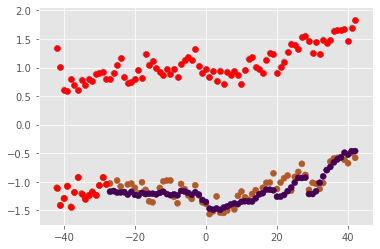

Epoch 9 batch 0 train Loss -0.5509 test Loss -0.5857 with training MSE metric 0.0205 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354


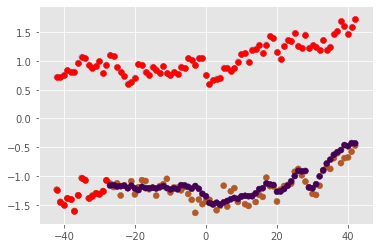

Epoch 9 batch 10 train Loss -0.5454 test Loss -0.5995 with training MSE metric 0.0211 and testing MSE metric 0.0174
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9627232551574707 secs



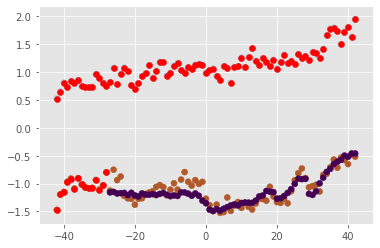

Epoch 10 batch 0 train Loss -0.5420 test Loss -0.5903 with training MSE metric 0.0212 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354


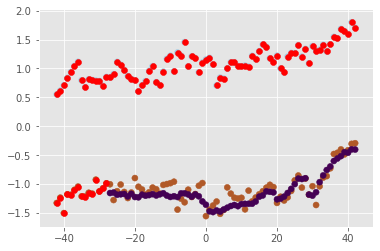

Epoch 10 batch 10 train Loss -0.5359 test Loss -0.5835 with training MSE metric 0.0220 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9509029388427734 secs



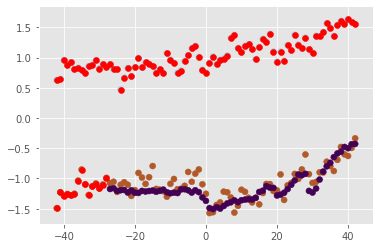

Epoch 11 batch 0 train Loss -0.5484 test Loss -0.5860 with training MSE metric 0.0212 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354


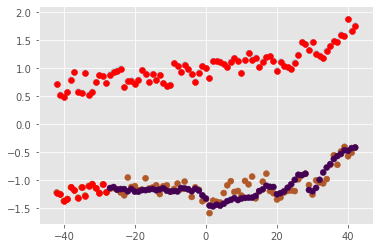

Epoch 11 batch 10 train Loss -0.5338 test Loss -0.5754 with training MSE metric 0.0219 and testing MSE metric 0.0192
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9758858680725098 secs



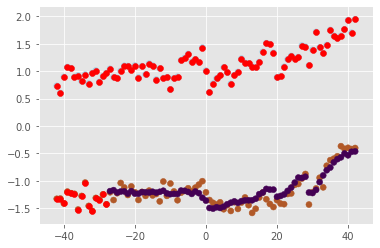

Epoch 12 batch 0 train Loss -0.5380 test Loss -0.5655 with training MSE metric 0.0218 and testing MSE metric 0.0198
learning rate is 0.0003000000142492354


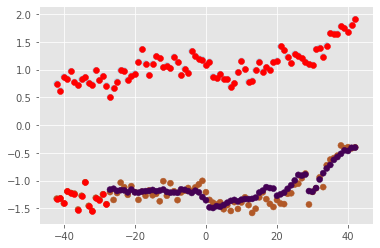

Epoch 12 batch 10 train Loss -0.5512 test Loss -0.5803 with training MSE metric 0.0210 and testing MSE metric 0.0187
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.992696762084961 secs



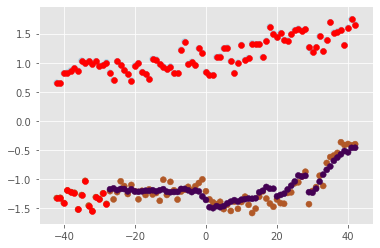

Epoch 13 batch 0 train Loss -0.5566 test Loss -0.5836 with training MSE metric 0.0203 and testing MSE metric 0.0188
learning rate is 0.0003000000142492354


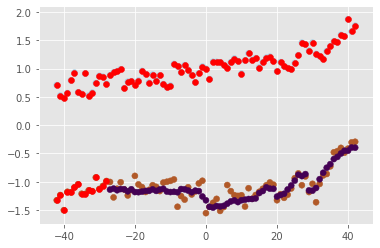

Epoch 13 batch 10 train Loss -0.5468 test Loss -0.5934 with training MSE metric 0.0210 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.902696132659912 secs



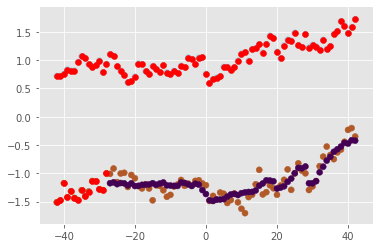

Epoch 14 batch 0 train Loss -0.5523 test Loss -0.5929 with training MSE metric 0.0206 and testing MSE metric 0.0181
learning rate is 0.0003000000142492354


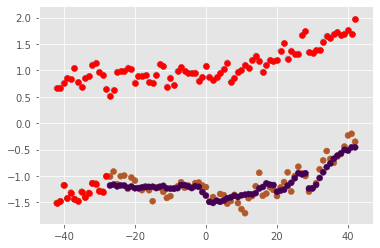

Epoch 14 batch 10 train Loss -0.5495 test Loss -0.5588 with training MSE metric 0.0208 and testing MSE metric 0.0206
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9407150745391846 secs



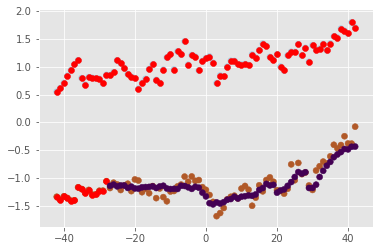

Epoch 15 batch 0 train Loss -0.5683 test Loss -0.6068 with training MSE metric 0.0195 and testing MSE metric 0.0170
learning rate is 0.0003000000142492354


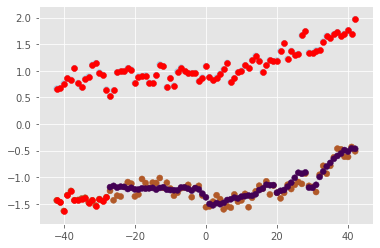

Epoch 15 batch 10 train Loss -0.5495 test Loss -0.5645 with training MSE metric 0.0216 and testing MSE metric 0.0198
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.943376064300537 secs



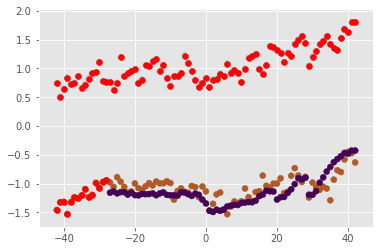

Epoch 16 batch 0 train Loss -0.5559 test Loss -0.5925 with training MSE metric 0.0203 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354


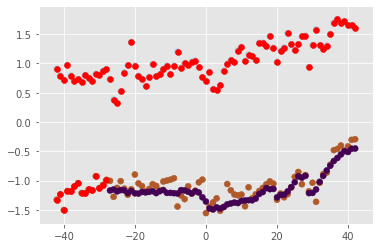

Epoch 16 batch 10 train Loss -0.5583 test Loss -0.5868 with training MSE metric 0.0205 and testing MSE metric 0.0189
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8200080394744873 secs



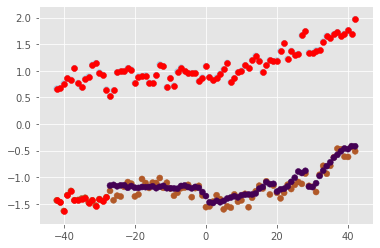

Epoch 17 batch 0 train Loss -0.5471 test Loss -0.6125 with training MSE metric 0.0209 and testing MSE metric 0.0168
learning rate is 0.0003000000142492354


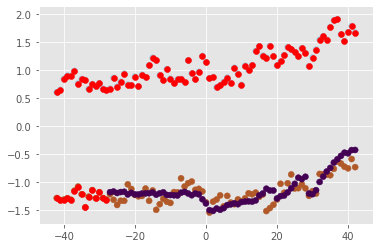

Epoch 17 batch 10 train Loss -0.5636 test Loss -0.6004 with training MSE metric 0.0200 and testing MSE metric 0.0175
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.785316228866577 secs



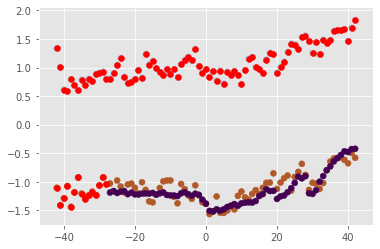

Epoch 18 batch 0 train Loss -0.5804 test Loss -0.5845 with training MSE metric 0.0189 and testing MSE metric 0.0187
learning rate is 0.0003000000142492354


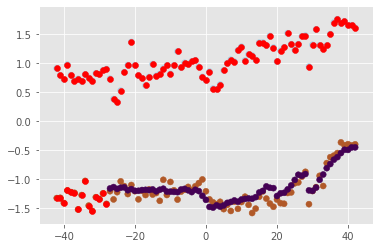

Epoch 18 batch 10 train Loss -0.5683 test Loss -0.5800 with training MSE metric 0.0195 and testing MSE metric 0.0192
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.798501968383789 secs



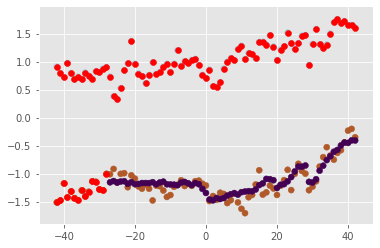

Epoch 19 batch 0 train Loss -0.5603 test Loss -0.5911 with training MSE metric 0.0202 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354


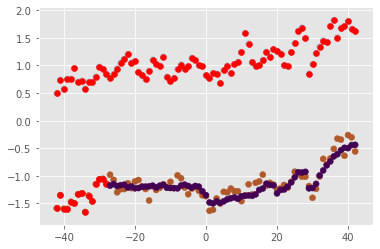

Epoch 19 batch 10 train Loss -0.5881 test Loss -0.5979 with training MSE metric 0.0181 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.789107322692871 secs



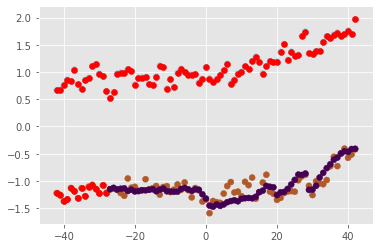

Epoch 20 batch 0 train Loss -0.5605 test Loss -0.5750 with training MSE metric 0.0199 and testing MSE metric 0.0193
learning rate is 0.0003000000142492354


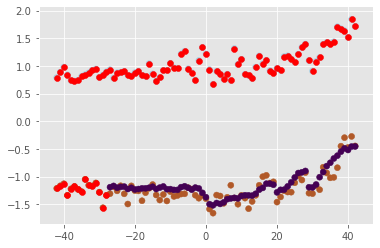

Epoch 20 batch 10 train Loss -0.5648 test Loss -0.6031 with training MSE metric 0.0203 and testing MSE metric 0.0172
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8143858909606934 secs



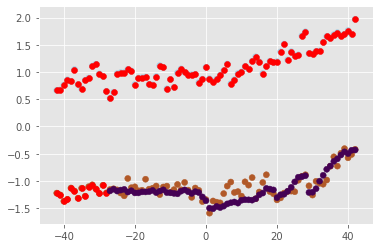

Epoch 21 batch 0 train Loss -0.5540 test Loss -0.6066 with training MSE metric 0.0209 and testing MSE metric 0.0172
learning rate is 0.0003000000142492354


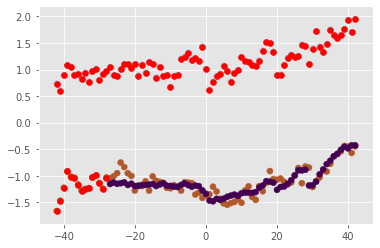

Epoch 21 batch 10 train Loss -0.5679 test Loss -0.6023 with training MSE metric 0.0199 and testing MSE metric 0.0177
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7884879112243652 secs



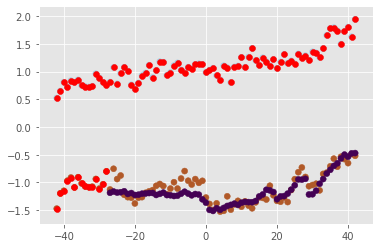

Epoch 22 batch 0 train Loss -0.5564 test Loss -0.5998 with training MSE metric 0.0207 and testing MSE metric 0.0175
learning rate is 0.0003000000142492354


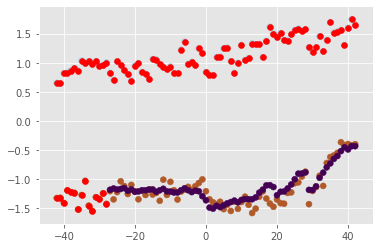

Epoch 22 batch 10 train Loss -0.5516 test Loss -0.5851 with training MSE metric 0.0208 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7979419231414795 secs



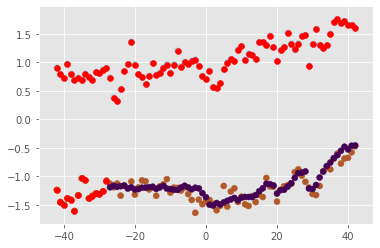

Epoch 23 batch 0 train Loss -0.5699 test Loss -0.5991 with training MSE metric 0.0196 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354


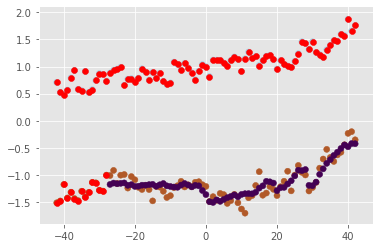

Epoch 23 batch 10 train Loss -0.5796 test Loss -0.5979 with training MSE metric 0.0187 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8182201385498047 secs



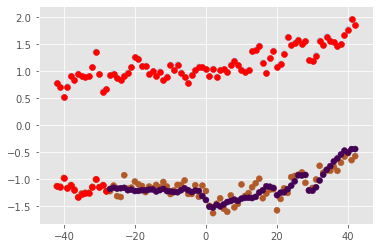

Epoch 24 batch 0 train Loss -0.5645 test Loss -0.5808 with training MSE metric 0.0197 and testing MSE metric 0.0192
learning rate is 0.0003000000142492354


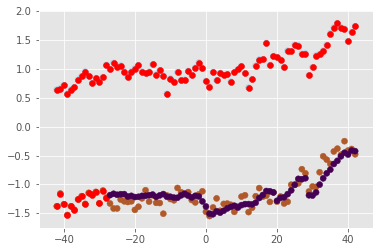

Epoch 24 batch 10 train Loss -0.5713 test Loss -0.5919 with training MSE metric 0.0198 and testing MSE metric 0.0183
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.801959753036499 secs



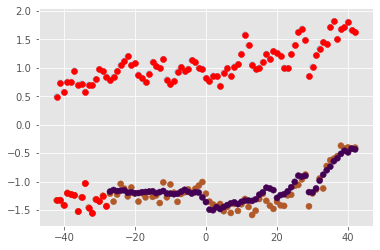

Epoch 25 batch 0 train Loss -0.5762 test Loss -0.6046 with training MSE metric 0.0193 and testing MSE metric 0.0175
learning rate is 0.0003000000142492354


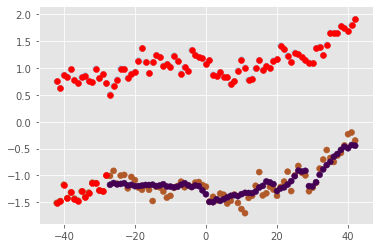

Epoch 25 batch 10 train Loss -0.5717 test Loss -0.5981 with training MSE metric 0.0191 and testing MSE metric 0.0183
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.802610158920288 secs



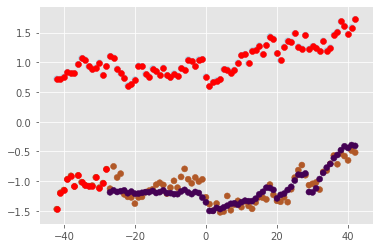

Epoch 26 batch 0 train Loss -0.5771 test Loss -0.5975 with training MSE metric 0.0193 and testing MSE metric 0.0181
learning rate is 0.0003000000142492354


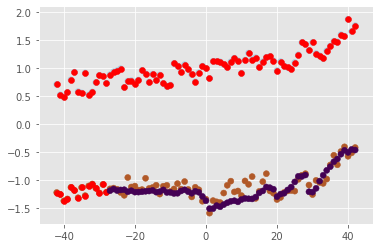

Epoch 26 batch 10 train Loss -0.5813 test Loss -0.6037 with training MSE metric 0.0188 and testing MSE metric 0.0172
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7949411869049072 secs



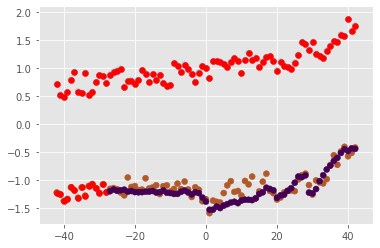

Epoch 27 batch 0 train Loss -0.5890 test Loss -0.5955 with training MSE metric 0.0185 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354


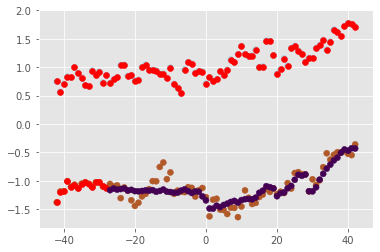

Epoch 27 batch 10 train Loss -0.5911 test Loss -0.5976 with training MSE metric 0.0178 and testing MSE metric 0.0177
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.811306953430176 secs



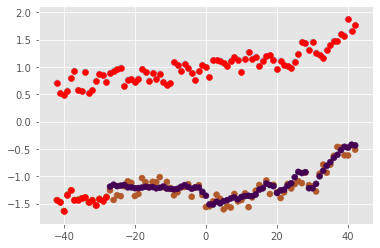

Epoch 28 batch 0 train Loss -0.5628 test Loss -0.5995 with training MSE metric 0.0198 and testing MSE metric 0.0175
learning rate is 0.0003000000142492354


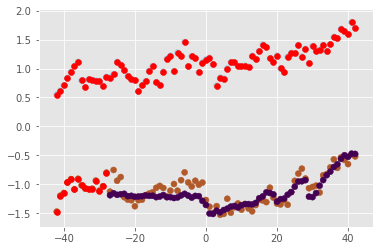

Epoch 28 batch 10 train Loss -0.5777 test Loss -0.5954 with training MSE metric 0.0192 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.811434030532837 secs



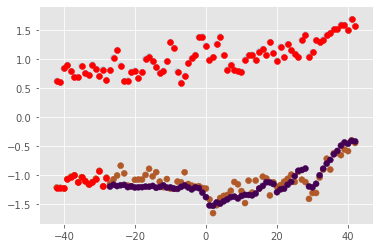

Epoch 29 batch 0 train Loss -0.5676 test Loss -0.5931 with training MSE metric 0.0196 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354


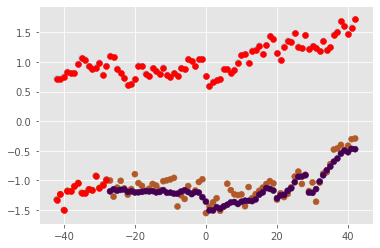

Epoch 29 batch 10 train Loss -0.5657 test Loss -0.5961 with training MSE metric 0.0196 and testing MSE metric 0.0180
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8049840927124023 secs



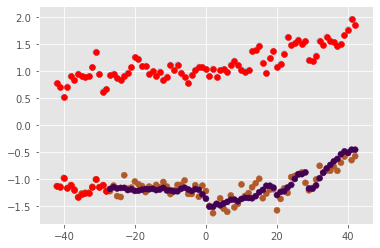

Epoch 30 batch 0 train Loss -0.5696 test Loss -0.5880 with training MSE metric 0.0194 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354


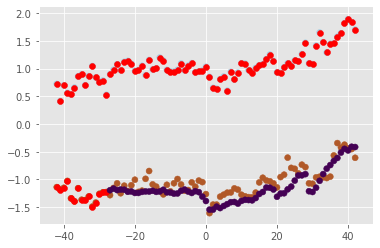

Epoch 30 batch 10 train Loss -0.5455 test Loss -0.5634 with training MSE metric 0.0210 and testing MSE metric 0.0201
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9359631538391113 secs



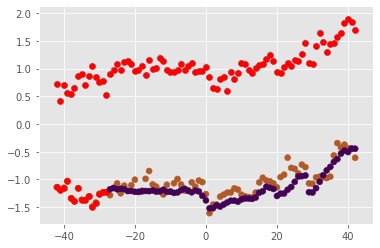

Epoch 31 batch 0 train Loss -0.5743 test Loss -0.5565 with training MSE metric 0.0193 and testing MSE metric 0.0204
learning rate is 0.0003000000142492354


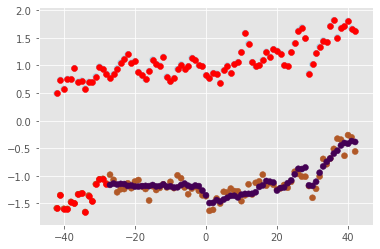

Epoch 31 batch 10 train Loss -0.5692 test Loss -0.5802 with training MSE metric 0.0196 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.80981707572937 secs



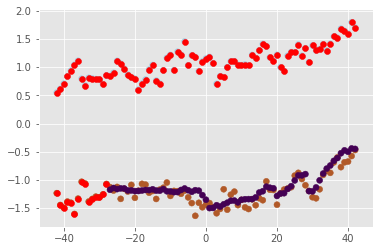

Epoch 32 batch 0 train Loss -0.5647 test Loss -0.6030 with training MSE metric 0.0197 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354


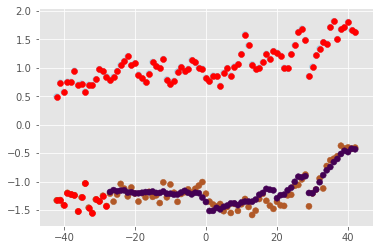

Epoch 32 batch 10 train Loss -0.5757 test Loss -0.5994 with training MSE metric 0.0195 and testing MSE metric 0.0179
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7991998195648193 secs



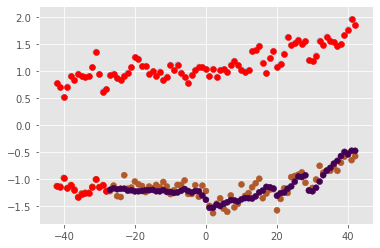

Epoch 33 batch 0 train Loss -0.5811 test Loss -0.5880 with training MSE metric 0.0188 and testing MSE metric 0.0184
learning rate is 0.0003000000142492354


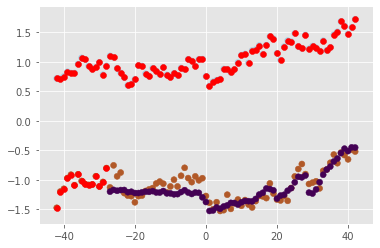

Epoch 33 batch 10 train Loss -0.5813 test Loss -0.5652 with training MSE metric 0.0186 and testing MSE metric 0.0197
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.783987283706665 secs



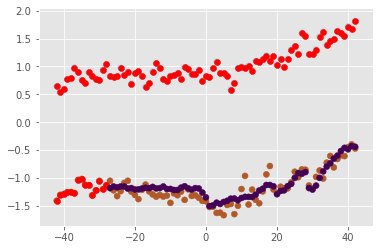

Epoch 34 batch 0 train Loss -0.5838 test Loss -0.5880 with training MSE metric 0.0184 and testing MSE metric 0.0188
learning rate is 0.0003000000142492354


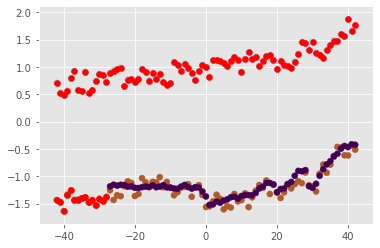

Epoch 34 batch 10 train Loss -0.5798 test Loss -0.5890 with training MSE metric 0.0191 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.845921754837036 secs



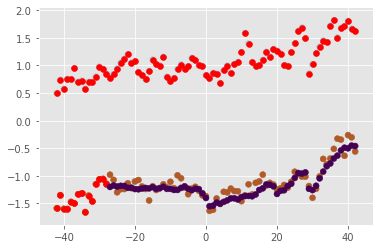

Epoch 35 batch 0 train Loss -0.5781 test Loss -0.5549 with training MSE metric 0.0191 and testing MSE metric 0.0207
learning rate is 0.0003000000142492354


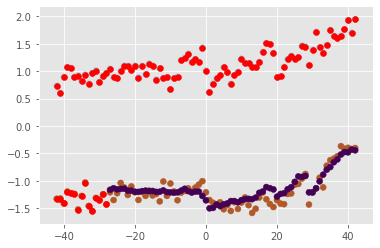

Epoch 35 batch 10 train Loss -0.5671 test Loss -0.6118 with training MSE metric 0.0196 and testing MSE metric 0.0171
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8880910873413086 secs



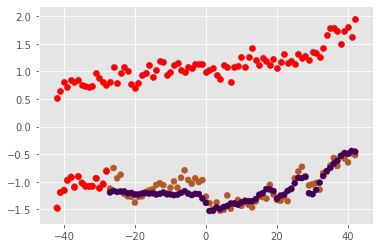

Epoch 36 batch 0 train Loss -0.5709 test Loss -0.5904 with training MSE metric 0.0197 and testing MSE metric 0.0184
learning rate is 0.0003000000142492354


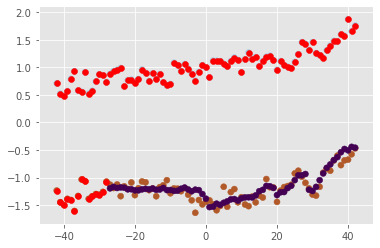

Epoch 36 batch 10 train Loss -0.5667 test Loss -0.5853 with training MSE metric 0.0200 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8669261932373047 secs



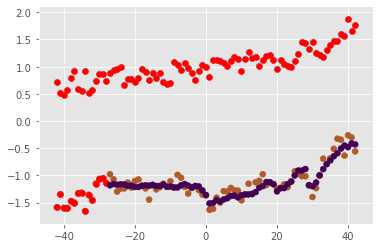

Epoch 37 batch 0 train Loss -0.5650 test Loss -0.5981 with training MSE metric 0.0204 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354


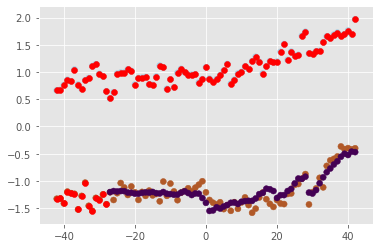

Epoch 37 batch 10 train Loss -0.5639 test Loss -0.5649 with training MSE metric 0.0200 and testing MSE metric 0.0199
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8839101791381836 secs



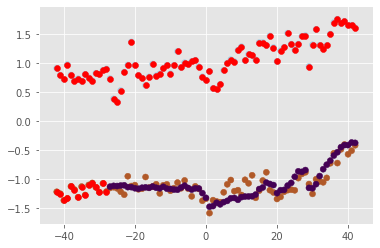

Epoch 38 batch 0 train Loss -0.5889 test Loss -0.5947 with training MSE metric 0.0184 and testing MSE metric 0.0182
learning rate is 0.0003000000142492354


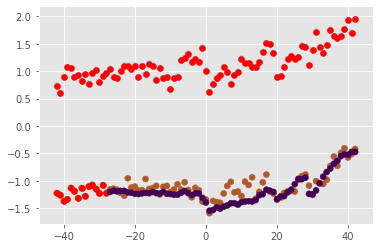

Epoch 38 batch 10 train Loss -0.5847 test Loss -0.5616 with training MSE metric 0.0184 and testing MSE metric 0.0206
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.927612066268921 secs



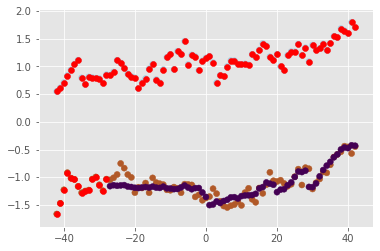

Epoch 39 batch 0 train Loss -0.5801 test Loss -0.5994 with training MSE metric 0.0190 and testing MSE metric 0.0177
learning rate is 0.0003000000142492354


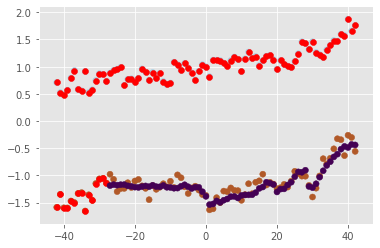

Epoch 39 batch 10 train Loss -0.5918 test Loss -0.6164 with training MSE metric 0.0180 and testing MSE metric 0.0167
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.944783926010132 secs



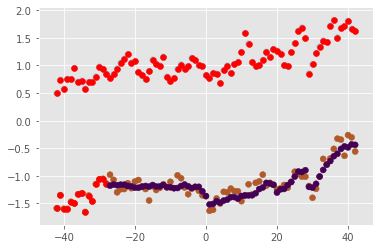

Epoch 40 batch 0 train Loss -0.5740 test Loss -0.6089 with training MSE metric 0.0192 and testing MSE metric 0.0172
learning rate is 0.0003000000142492354


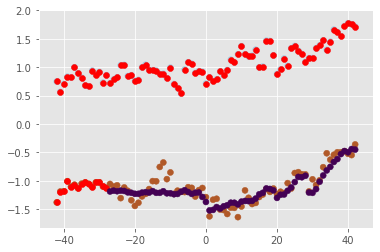

Epoch 40 batch 10 train Loss -0.5907 test Loss -0.5799 with training MSE metric 0.0183 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.943992853164673 secs



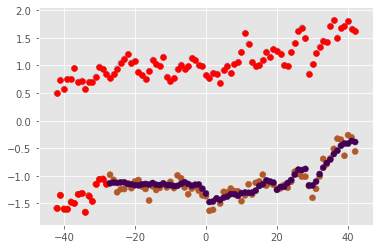

Epoch 41 batch 0 train Loss -0.5757 test Loss -0.5855 with training MSE metric 0.0192 and testing MSE metric 0.0188
learning rate is 0.0003000000142492354


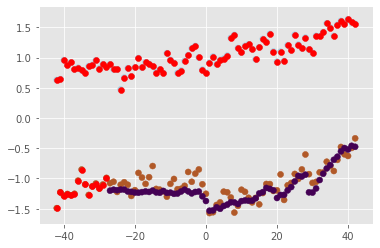

Epoch 41 batch 10 train Loss -0.5791 test Loss -0.5669 with training MSE metric 0.0191 and testing MSE metric 0.0200
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.901172399520874 secs



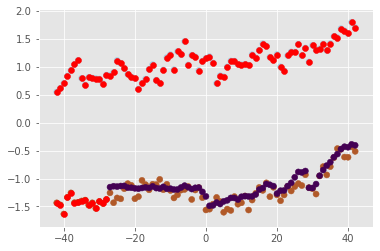

Epoch 42 batch 0 train Loss -0.5819 test Loss -0.5981 with training MSE metric 0.0185 and testing MSE metric 0.0179
learning rate is 0.0003000000142492354


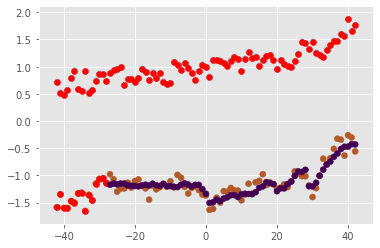

Epoch 42 batch 10 train Loss -0.5636 test Loss -0.6067 with training MSE metric 0.0202 and testing MSE metric 0.0173
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9553380012512207 secs



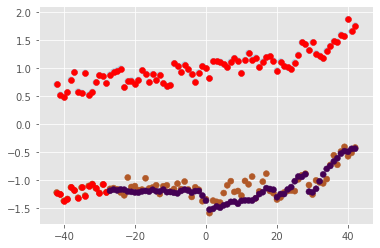

Epoch 43 batch 0 train Loss -0.5870 test Loss -0.6132 with training MSE metric 0.0184 and testing MSE metric 0.0169
learning rate is 0.0003000000142492354


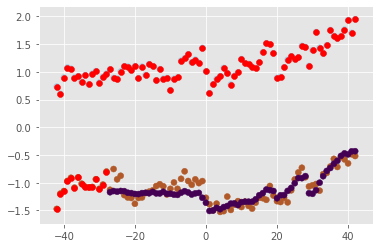

Epoch 43 batch 10 train Loss -0.5840 test Loss -0.6093 with training MSE metric 0.0186 and testing MSE metric 0.0171
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.950165033340454 secs



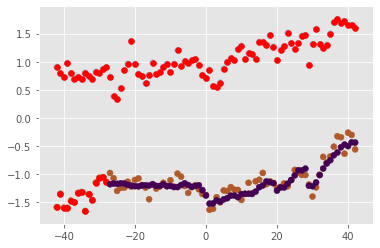

Epoch 44 batch 0 train Loss -0.5672 test Loss -0.5781 with training MSE metric 0.0201 and testing MSE metric 0.0193
learning rate is 0.0003000000142492354


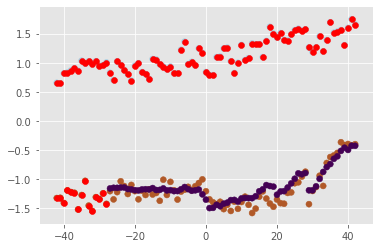

Epoch 44 batch 10 train Loss -0.5730 test Loss -0.5878 with training MSE metric 0.0196 and testing MSE metric 0.0185
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9057722091674805 secs



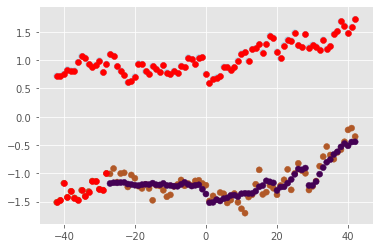

Epoch 45 batch 0 train Loss -0.5829 test Loss -0.5800 with training MSE metric 0.0191 and testing MSE metric 0.0189
learning rate is 0.0003000000142492354


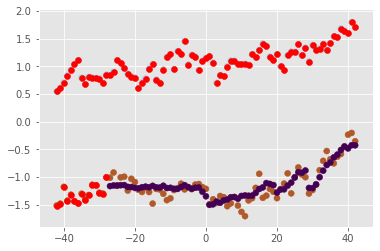

Epoch 45 batch 10 train Loss -0.5870 test Loss -0.6046 with training MSE metric 0.0188 and testing MSE metric 0.0176
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8959929943084717 secs



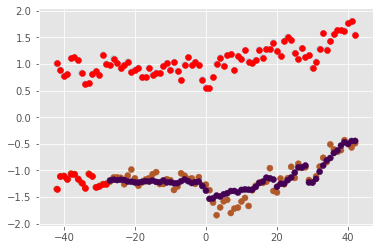

Epoch 46 batch 0 train Loss -0.5811 test Loss -0.5889 with training MSE metric 0.0189 and testing MSE metric 0.0183
learning rate is 0.0003000000142492354


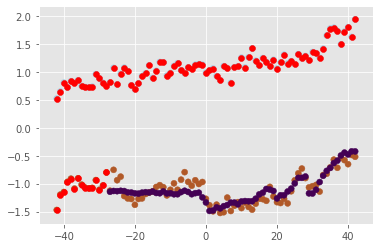

Epoch 46 batch 10 train Loss -0.5850 test Loss -0.6017 with training MSE metric 0.0186 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.030918121337891 secs



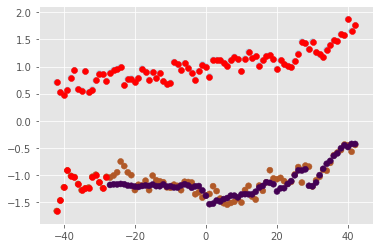

Epoch 47 batch 0 train Loss -0.5682 test Loss -0.5876 with training MSE metric 0.0199 and testing MSE metric 0.0186
learning rate is 0.0003000000142492354


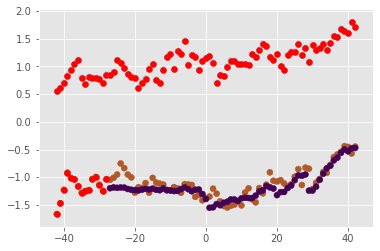

Epoch 47 batch 10 train Loss -0.5820 test Loss -0.5491 with training MSE metric 0.0186 and testing MSE metric 0.0207
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.886056900024414 secs



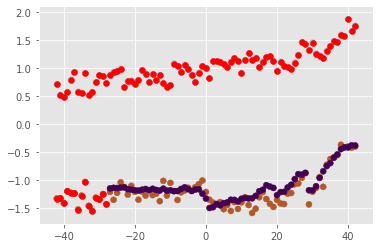

Epoch 48 batch 0 train Loss -0.5870 test Loss -0.5839 with training MSE metric 0.0185 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354


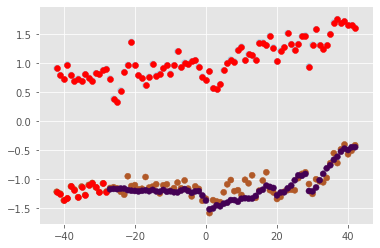

Epoch 48 batch 10 train Loss -0.5763 test Loss -0.5768 with training MSE metric 0.0192 and testing MSE metric 0.0196
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8995161056518555 secs



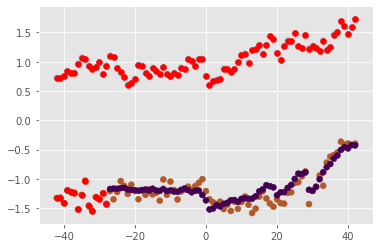

Epoch 49 batch 0 train Loss -0.5790 test Loss -0.5964 with training MSE metric 0.0192 and testing MSE metric 0.0183
learning rate is 0.0003000000142492354


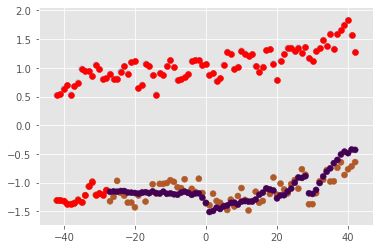

Epoch 49 batch 10 train Loss -0.5723 test Loss -0.5882 with training MSE metric 0.0194 and testing MSE metric 0.0188
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9045448303222656 secs



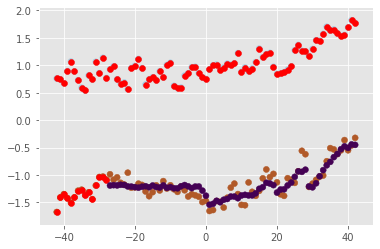

Epoch 50 batch 0 train Loss -0.5768 test Loss -0.5592 with training MSE metric 0.0191 and testing MSE metric 0.0203
learning rate is 0.0003000000142492354


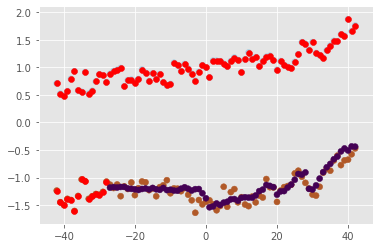

Epoch 50 batch 10 train Loss -0.5834 test Loss -0.5796 with training MSE metric 0.0189 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.063643217086792 secs



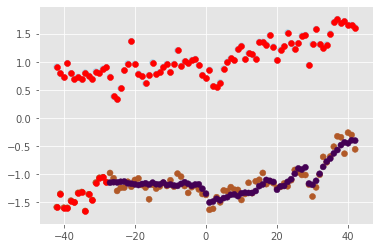

Epoch 51 batch 0 train Loss -0.5679 test Loss -0.6099 with training MSE metric 0.0201 and testing MSE metric 0.0170
learning rate is 0.0003000000142492354


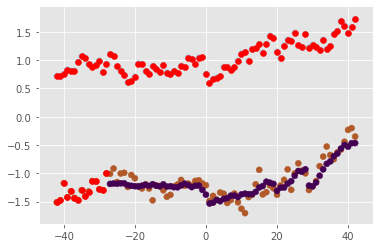

Epoch 51 batch 10 train Loss -0.5809 test Loss -0.5722 with training MSE metric 0.0191 and testing MSE metric 0.0193
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.1871819496154785 secs



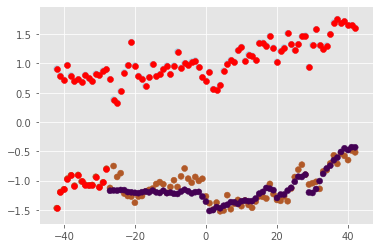

Epoch 52 batch 0 train Loss -0.5750 test Loss -0.6004 with training MSE metric 0.0195 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354


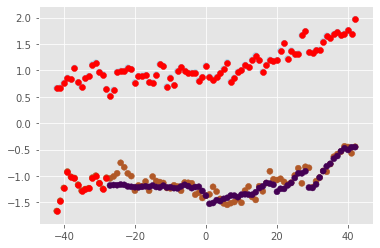

Epoch 52 batch 10 train Loss -0.5640 test Loss -0.5876 with training MSE metric 0.0199 and testing MSE metric 0.0189
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.110102653503418 secs



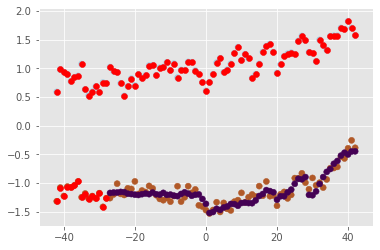

Epoch 53 batch 0 train Loss -0.5966 test Loss -0.5872 with training MSE metric 0.0177 and testing MSE metric 0.0186
learning rate is 0.0003000000142492354


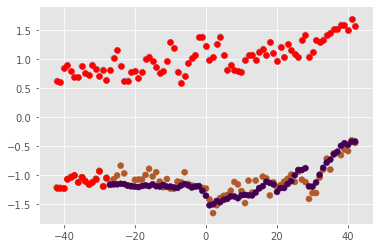

Epoch 53 batch 10 train Loss -0.5911 test Loss -0.5981 with training MSE metric 0.0186 and testing MSE metric 0.0183
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.01855731010437 secs



KeyboardInterrupt: 

In [61]:
if __name__ == '__main__':
    tf.random.set_seed(443); step = 0
    # change to run 9 if you want to overfit
    EPOCHS = 575; batch_s  = 32; run = 2; tr_regime ='shuffle'
    l= [96, 64, 32]; heads = 32; e = 96; context = 100; c=100
    decoder, optimizer_c, ckpt, manager, num_batches, writer, folder = helpers.pre_trained_loader(data[3], save_dir, e, l, d=d, batch_s=64, context=context, heads=1, run=run)
    with writer.as_default():
        for epoch in range(EPOCHS):
            start = time.time()
            for batch_n in range(20):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    idxs = np.random.choice(np.arange(380), 32)
                    permute_idx = np.arange(170)
                    y_tr = y[idxs, :][:, permute_idx] 
                    to_gather = helpers.gather_idx(c,  l=170, b=32)
                    temp = np.zeros((32, 170))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
#                   b_data, c = batch_creator.batch_regime_2d(x = data[-3], y = data[-1], em = data[2] , em_2 =  data[3], batch_s=64, context_p=50, kind='shuffle')
                    # add parameter b=20 to helpers.gather_idx if you want to overfit and comment line above
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, batch_x[:, permute_idx], y_tr, d = True, to_gather=temp)
                else:
#                     b_data = batch_creator.create_batch(em_x = data[1], x = data[3], y = data[-1], batch_s=64, d=d)
                    to_gather = helpers.gather_idx(context, l=200, b=2)
                    temp = np.zeros((b_data[0].shape[0], b_data[0].shape[1]))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], y2=b_data[3], to_gather = temp)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context, heads)
                if batch_n % 10 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        idxs_te = np.random.choice(np.arange(380, 465), 32)
                        permute_idx_te = np.arange(170)
                        to_gather_te = helpers.gather_idx(c, l=170, b=32)
                        temp_te = np.zeros((32, 170))
                        temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
                        y_te = y[idxs_te, :][:, permute_idx_te] 
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = batch_x[:, permute_idx_te], y_te = y_te, to_gather=temp_te, d=True)
                        fig,ax = plt.subplots()
                        
                        ax.scatter(t, y_te[1], c=k, cmap=cmap)
                        ax.scatter(t[:100], y_te[1][:100], c='red')
                        ax.scatter(t[100:], pred_te[1, 99:], c=k[100:]) 
                        plt.show()
                        
                        
                        
#                         b_data_te, c_te = batch_creator.batch_regime_2d(x = data[-4], y = data[-2], em = data[0] , em_2 =  data[1], batch_s=64, context_p=context, kind=tr_regime)
#                         to_gather_te = helpers.gather_idx(c_te)
#                         temp_te = np.zeros((b_data_te[0].shape[0], b_data_te[0].shape[1]))
#                         temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
#                         pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=temp_te, d=True)
#                         ## Plotting progress by looking at a random test case. Erase _te from the six lines below if you rather observe training

#                         if to_gather_te is not None:
#                             # change 64 to 20 if you are overfitting
#                             idd = np.random.choice(np.arange(0, 64))
#                             seq_l = to_gather_te[to_gather_te[:, 0] == idd][0, 1]
#                             plt.scatter(b_data_te[1][idd, :seq_l], b_data_te[0][idd, :seq_l] , c = 'blue', label = 'context')
#                             plt.scatter(b_data_te[1][idd, seq_l:], b_data_te[0][idd, seq_l:], c = 'black', label = 'observed func.', alpha=0.5)
#                             plt.scatter(b_data_te[1][idd, seq_l:], pred_te[idd][(seq_l - 1):], label = 'predicted func.')
#                             plt.legend()
#                             plt.show()
#                         else:
#                             plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = b_data_te[2], y_te = b_data_te[0], em_2_te = b_data_te[3] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], y2_te=b_data_te[3], to_gather = temp)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = b_data_te[2], y_te = b_data_te[0], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
#                     if d:
#                         m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
#                         m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
#                         print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
#                         print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))
                    manager.save()
                step += 1
                ckpt.step.assign_add(1)
            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

In [304]:
y.shape

(465, 170)

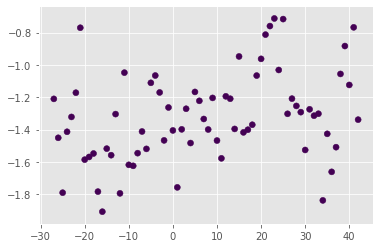

In [299]:
plt.scatter(t[100:], pred_te[1, 99:], c=k[100:]) 

### Embeddings in tensorboard

In [ ]:
helpers.tensorboard_embeddings(decoder, layer_num = 0, meta_data = np.concatenate(([0, 1], np.unique(b_data[2]))))

### Inference

In [311]:
x_s.shape

(1, 170, 82)

In [313]:
batch_x.shape

(32, 170, 82)

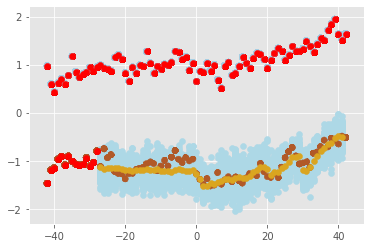

In [64]:
idd = np.random.choice(np.arange(65))
fig,ax = plt.subplots()
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[400 + idd, :100] 
    y_s = y_s[:-1][None, :]
    for i in range(69):
        x_s = x[:, :(100 + i), :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
    ax.scatter(t, y[400+idd], c=k, cmap=cmap)
    ax.scatter(t[:100], y[400+idd][:100], c='red')
    ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='lightblue')
x = batch_x[0, :][None, :, :]
y_s = y[400 + idd, :100] 
y_s = y_s[:-1][None, :]
for i in range(69):
    x_s = x[:, :(100 + i), :]
    _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
    y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
ax.scatter(t, y[400+idd], c=k, cmap=cmap)
ax.scatter(t[:100], y[400+idd][:100], c='red')
ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='goldenrod') 

In [41]:
def evaluate(model, x, y, sample=True, d=False):

    combined_mask_x = masks.create_masks(x[:, :, 0])
    pred = model(x, y, False, combined_mask_x[:, :-1, :-1])
    if sample:
        sample_y = np.random.normal(pred[-1, 0], np.exp(pred[-1, 1]))
    else:
        sample_y = pred[-1, 0]

    return pred[:, 0], pred[:, 1], sample_y

In [42]:
from helpers import masks